In [1]:
import numpy as np
import tensorflow as tf

### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
X = data[:,0:1]
y = data[:,1:]

print('X\n', X)
print('y\n', y)

X
 [[6.7]
 [4.6]
 [3.5]
 [5.5]]
y
 [[9.1]
 [5.9]
 [4.6]
 [6.7]]


# Tracing - One sample

In [10]:
# theta
W = tf.Variable(-0.34)
b = tf.Variable(0.04)

# forward
def compute_output(X, W, b):
    return W*X + b

# some params
lr = 0.01
epochs = 2

In [11]:
# training
for epoch in range(epochs):
    x_data = X[0]
    y_data = y[0]
    
    with tf.GradientTape() as t:
        # y_hat
        y_hat = compute_output(x_data, W, b)
        print('y_hat\n', y_hat)
        
        # loss        
        loss = tf.square(y_hat - y_data)
        print('loss\n', loss)
                
    # gradient        
    dW, db = t.gradient(loss, [W, b])
    print('dW\n', dW)    
    print('db\n', db) 

    # update
    W.assign_sub(lr*dW)
    b.assign_sub(lr*db)        
    print('W\n', W) 
    print('b\n', b)

y_hat
 tf.Tensor([-2.238], shape=(1,), dtype=float32)
loss
 tf.Tensor([128.55025], shape=(1,), dtype=float32)
dW
 tf.Tensor(-151.9292, shape=(), dtype=float32)
db
 tf.Tensor(-22.676, shape=(), dtype=float32)
W
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.179292>
b
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.26676>
y_hat
 tf.Tensor([8.168016], shape=(1,), dtype=float32)
loss
 tf.Tensor([0.86859405], shape=(1,), dtype=float32)
dW
 tf.Tensor(-12.4885845, shape=(), dtype=float32)
db
 tf.Tensor(-1.8639679, shape=(), dtype=float32)
W
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.3041778>
b
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.28539968>


# Training - One sample

In [2]:
import numpy as np
import tensorflow as tf

### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
X = data[:,0:1]
y = data[:,1:]

print(X)
print(y)

[[6.7]
 [4.6]
 [3.5]
 [5.5]]
[[9.1]
 [5.9]
 [4.6]
 [6.7]]


In [3]:
# theta
W = tf.Variable(-0.34)
b = tf.Variable(0.04)

# forward
def compute_output(X, W, b):
    return W*X + b

# some params
lr = 0.01
epochs = 20
losses = []

# forward
def compute_output(X, W, b):
    return W*X + b

# training
for epoch in range(epochs):
    for x_data, y_data in zip(X, y):
        with tf.GradientTape() as t:
            # y_hat
            y_hat = compute_output(x_data, W, b)

            # loss       
            loss = tf.square(y_hat - y_data)

        # debug
        losses.append(loss.numpy())

        # gradient        
        dW, db = t.gradient(loss, [W, b])

        # update
        W.assign_sub(lr*dW)
        b.assign_sub(lr*db)

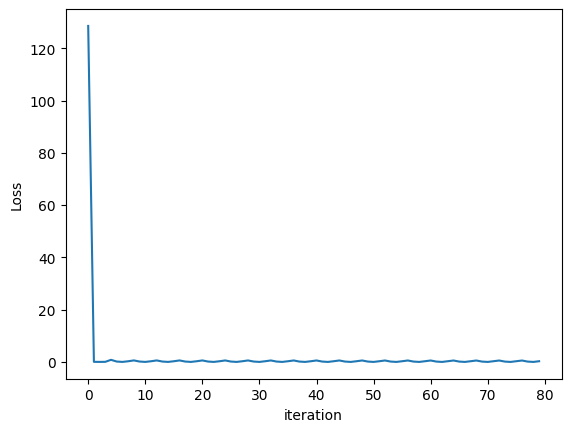

In [4]:
import matplotlib.pyplot as plt

# plot losses
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [5]:
W

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.2221994>

In [6]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.17510723>

# Training - N samples

In [9]:
# theta
W = tf.Variable(-0.34)
b = tf.Variable(0.04)

# forward
def compute_output(X, W, b):
    return W*X + b

# some params
lr = 0.01
epochs = 100
losses = []

# training
for epoch in range(epochs):
    with tf.GradientTape() as t:
        # y_hat
        y_hat = compute_output(X, W, b)
        
        # loss
        loss = tf.reduce_mean(tf.square(y_hat - y))
                
    # debug
    losses.append(loss.numpy())

    # gradient        
    dW, db = t.gradient(loss, [W, b])

    # update
    W.assign_sub(lr*dW)
    b.assign_sub(lr*db)

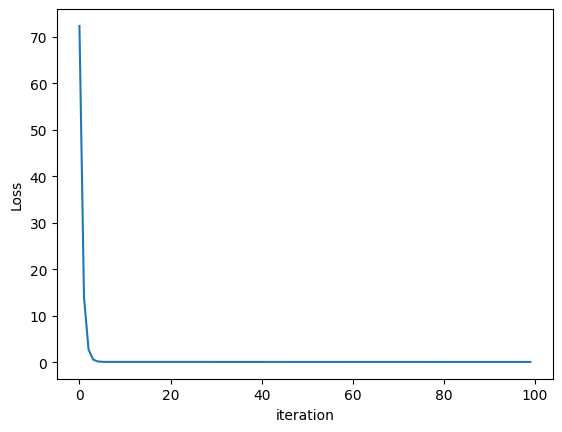

In [10]:
import matplotlib.pyplot as plt

# plot losses
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()